<h1><center> 
     Example of hvsrprocpy Usage
</center></h1>
<center>
    By: Francisco Javier G. Ornelas (jornela1@ucla.edu)<br>Originally created: Apr. 28, 2024<br>
</center>
<center>
    This jupyter notebook will walk you through the various functions that are contained in this library.
</center>

# Download the python library if not already done so

In [2]:
# pip install hvsrprocpy

# Load in the necessary python libraries

In [1]:
#Import the hvsrprocpy package
import os
import hvsrprocpy as hv
import pymysql, json
import pandas as pd
from hvsrprocpy import HvsrMetaTools as hmt
import numpy as np

# If you need help, see below:

In [2]:
#Print statement to see what are the functions and inputs within hvsrProc
# help(hv.hvsr)

# Process the microtremor or earthquake data and get HVSR

Pre-processing noise data is DONE!


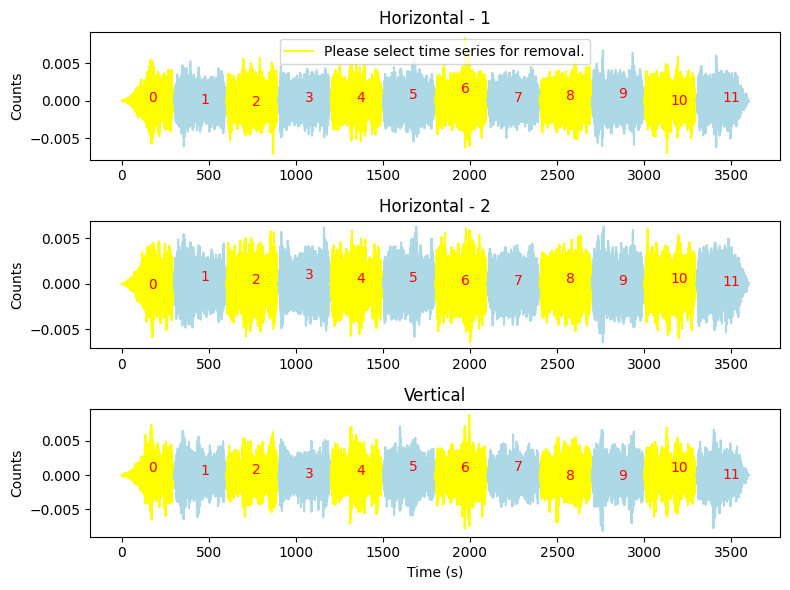

Enter the index of the window to remove (Press q to quit): q
Time-domain selection is DONE!
Preparing for frequency-domain, please wait...


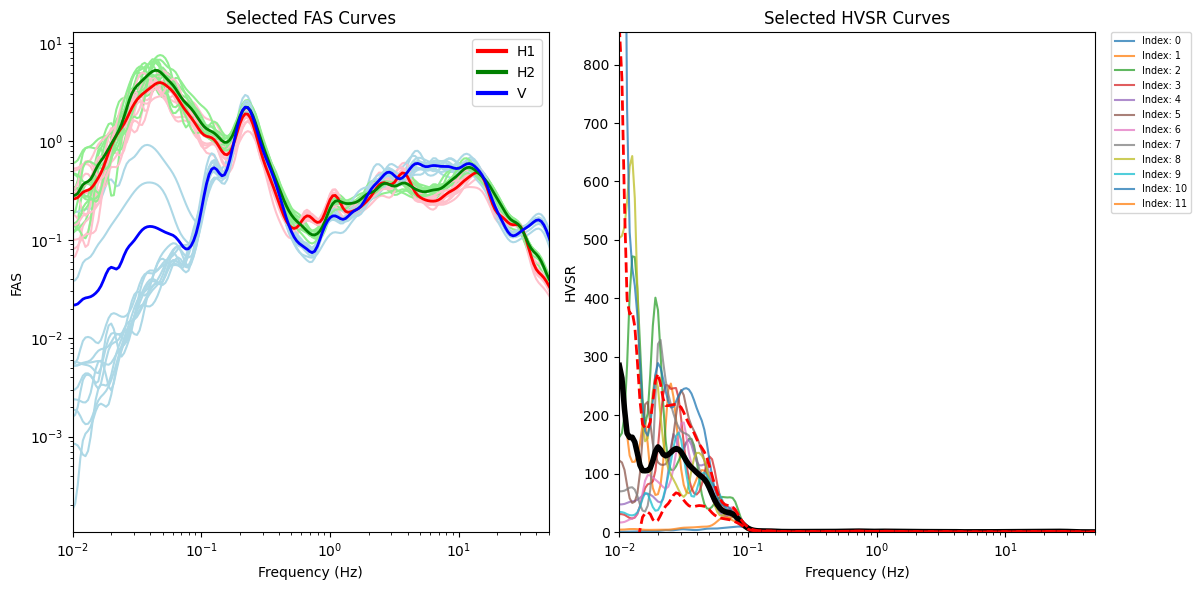

Enter the index of the curve to remove (press 'q' to quit): q
Frequency-domain selection is DONE!
Calculating and generating polar curve data, please wait......
Everything is DONE, check out the results in the output folder!
CPU times: total: 13.6 s
Wall time: 32.6 s


In [3]:
%%time

#Specify directory where .txt or .mseed files are stored
direc = r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\VSPDB Data\CA Vertical Array Data\HVSRdata\2\2.250.2\Text_File_data\Raw_mseed_PEG_HH'

#Specify filenames of .mseed or .txt files
h1 = 'NX.USC6..HHE.D.2022.250'
h2 = 'NX.USC6..HHN.D.2022.250'
v = 'NX.USC6..HHZ.D.2022.250'

#specify where you want output to be stored
output_dir = r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data'

#Extract arrays from the data given for each component

#Time cut in seconds from beginning and end
time_cut = 120

#indicates whether file tpye is mseed/sac (1) or txt/csv (2)
file_type = 1

h1, h2, v, dt, time = \
hv.process_time_series(h1_fn=h1, h2_fn=h2, v_fn=v, directory=direc, file_type=file_type, time_cut=time_cut)

#Apply pre-processing and pre-filtering
pre_filter_flag=True
#Apply filtering within windows
filter_flag = True
#Decide whether to use Mean or Median
mean_flag = True
#Window Width
win_width = 300
#Overlapping
overlapping = 0
#Decide whether to plot time series (True = skip)
plot_ts = True
#Decide whether to plot HVSR and FAS (True = skip)
plot_hvsr = True
#Decide whether to output polar/azimuthal curves
output_polar_curves = True
#Decide whether to output FAS curves for selected windows
output_fas_sel_curves = True
#Apply normalization to time series
norm_flag = True
#Bandwith for KO smoothing (>b less smoothing)
ko_smooth_b = 20

#Use the main function hv_proc which processes time series and hvsr
win_result, fd_select = \
hv.hvsr(h1=h1, h2 =h2, v=v, dt = dt, time_ts=time, output_dir=output_dir, pre_filter_flag=pre_filter_flag, filter_flag=filter_flag, 
        mean_flag=mean_flag, win_width=win_width, overlapping=overlapping, plot_ts=plot_ts, plot_hvsr=plot_hvsr, 
        output_polar_curves=output_polar_curves, output_fas_sel_curves=output_fas_sel_curves, norm_flag=norm_flag, 
        ko_smooth_b=ko_smooth_b)

# Plot the polar/azimuthal curves

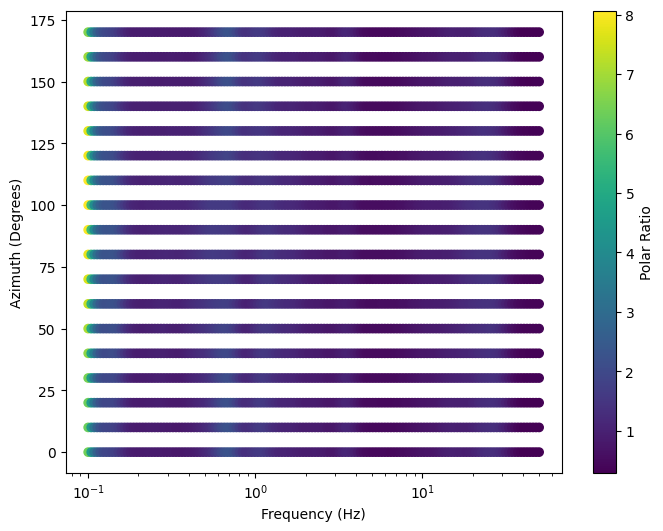

In [4]:
#Plot Polar Curve from output of hvsrProc

#specify directory where polar curve data is stored
POLAR = pd.read_csv(os.path.join(output_dir,'Test_hvsr_polar.csv'))

#specify where json file of frequencies is stored
standard_freqs = json.load(open(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\Site Response Modelling Inv\GMDB OSAKA INV\mean_curves/HVSR_VSPDB_standard_frequencies.json'))

#specify degree increment
deg_increment = 10

#Specify azimuth
AZIMUTHS = list(range(0, 180, deg_increment))

#Process polar curve data
processed_pol_data = hv.process_polar_curve(polar_data = POLAR, azimuths = AZIMUTHS, standard_freqs = standard_freqs)

#Plot the polar curve
fig = hv.plot_polar_ratio(processed_pol_data)

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)

# Plot the mean curves with the associated metadata

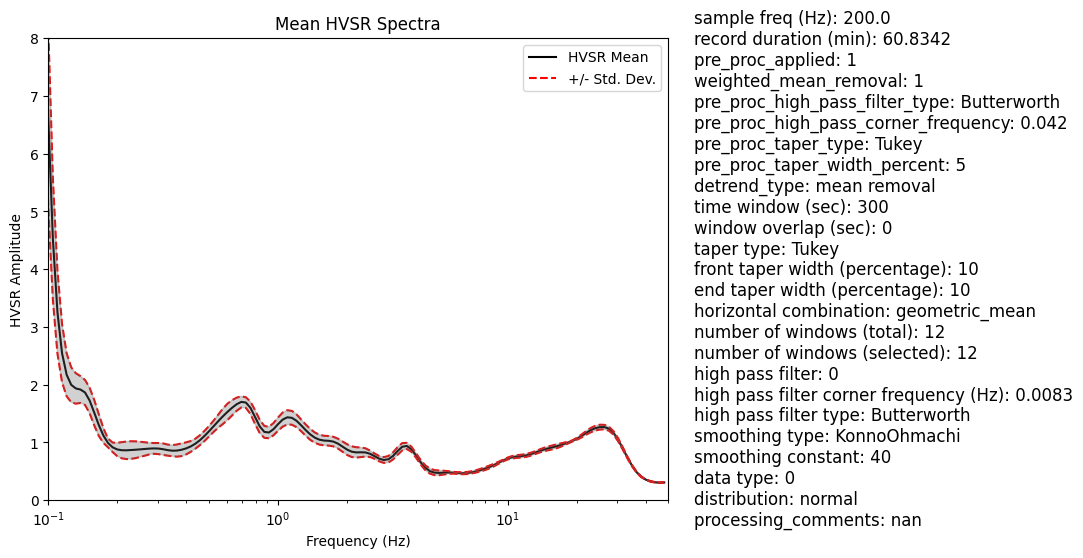

In [5]:
#Specify directory where mean hvsr curve is stored
Mean_df = os.path.join(output_dir,'Test_hvsr_mean.csv')

#Specify directory where metadata is stored
metadata_csv_filepath = os.path.join(direc,'Test_metadata.csv')

#Plot the mean curve
fig = hv.plot_mean_hvsr(csv_file_path=Mean_df, metadata_csv_path=metadata_csv_filepath, xlim_m = 65, ylim_m = 4,
                              xlim=(0.1, 50), ylim=(0,8), robust_est=False, metadata_flag=True)

# Plot the windowed time series data

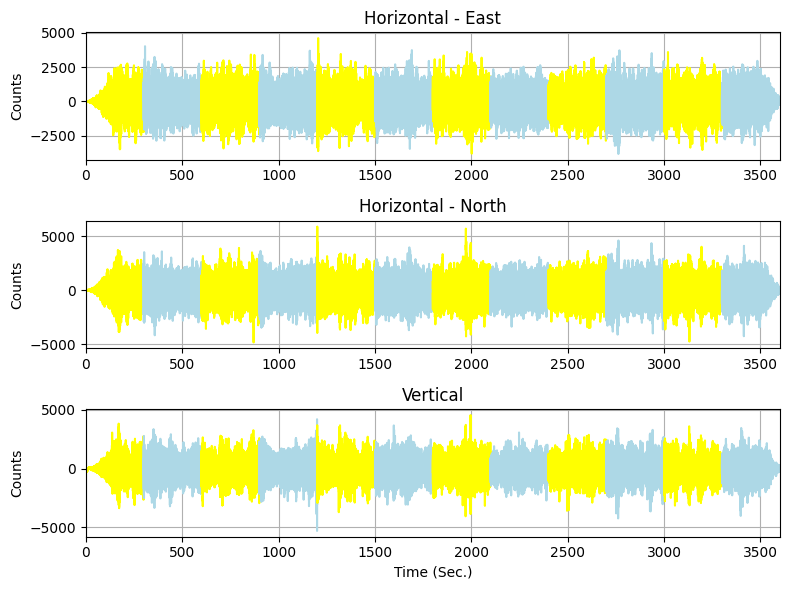

In [6]:
#Plot selected and unselected time series

#Specify directory where the time series is stored
ts_df = os.path.join(output_dir,'Test_ts_sel.csv')

#Plot the time series
fig = hv.plot_selected_time_series(csv_file_path = ts_df)

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)

# Plot the selected HVSR curves used to develop mean curve

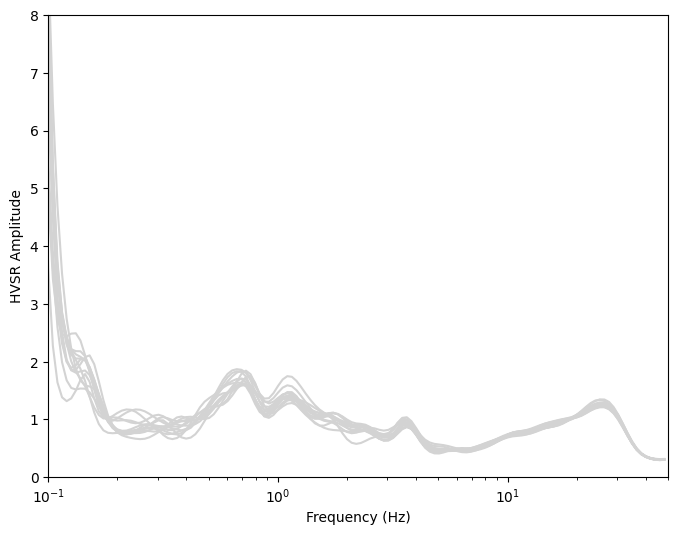

In [7]:
#Plot selected time series

#Specify where the directory for the selected hvsr curves are located
sel_curve_dir = os.path.join(output_dir,'Test_hvsr_sel.csv')

#Plot the selected hvsr curves
fig = hv.plot_selected_hvsr(sel_curve_dir,xlim=(0.1, 50), ylim=(0, 8))

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)

# Plot the mean FAS

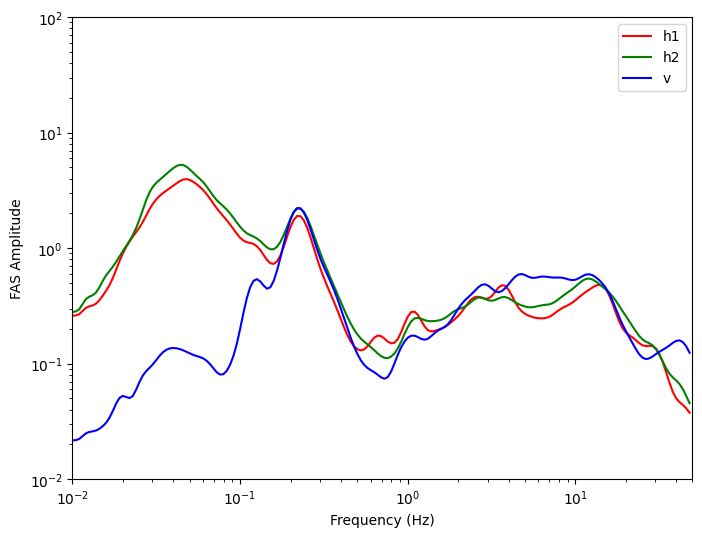

In [12]:
csv_path = os.path.join(output_dir,'Test_FAS_mean.csv')

fig = hv.plot_mean_fas(csv_path, xlim=(0.01, 50), ylim=(10e-3, 10e1))

# fig.savefig(r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\HVSR VSPDB Data/test.png', dpi =500)

# Plot selected FAS curves

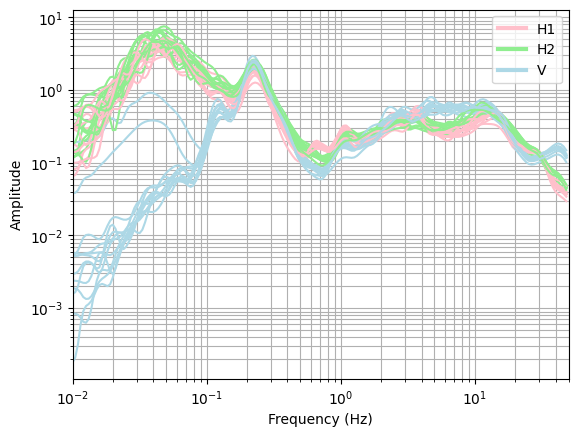

In [21]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

csv_path = os.path.join(output_dir,'Test_fas_sel.csv')

h1_color = 'pink'
h2_color = 'lightgreen'
v_color = 'lightblue'

xlim = (0.01, 50)

# Load the data
fas_sel_out_df = pd.read_csv(csv_path, header=None)
fas_sel_out_df = fas_sel_out_df[1:].astype(float)

# Extract frequency values
freq_hv_mean = fas_sel_out_df[0].values

# Initialize the figure
plt.figure()

# Process each window
num_windows = (len(fas_sel_out_df.columns) - 1) // 3  # Calculate the number of windows

colors = [h1_color, h2_color, v_color]
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['H1', 'H2', 'V']

for i in range(num_windows):
    # Calculate column indices for the current window
    h1_col = 1 + 3 * i
    h2_col = 2 + 3 * i
    v_col = 3 + 3 * i

    # Extract data for the current window
    h1_smooth = fas_sel_out_df[h1_col].values
    h2_smooth = fas_sel_out_df[h2_col].values
    v_smooth = fas_sel_out_df[v_col].values

    # Plot the FAS curves for the current window
    plt.loglog(freq_hv_mean, h1_smooth, color=h1_color)
    plt.loglog(freq_hv_mean, h2_smooth, color=h2_color)
    plt.loglog(freq_hv_mean, v_smooth, color=v_color)

# Add labels, title, and legend
plt.xlim(*xlim)
# plt.ylim(*ylim)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(lines, labels, loc='upper right')
plt.grid(True, which = 'both')

# Show the plot
plt.show()



# Get a csv file containing all the metadata for all stations

In [27]:
#Example of using tools to process metadata for station xml files

#Specify the static metadata
field_crew = None
user = 'francisco javier ornelas'
weather = None
ground_type = None
sensor_ground_coupling = None
monochromatic = None
building = None
transients = None
data_type = 0
sensor_corner_frequency = 0.0083
gain = 1
comments = None

#Specify the directory where the stations are stored
directory = r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\10'

#Run the tool
df = hmt.process_hvsr_metadata(field_crew, user, weather, ground_type, sensor_ground_coupling,
                                            monochromatic, building, transients, data_type,
                                            sensor_corner_frequency, gain, comments, directory)

#Save the dataframe (df) if needed
# df.to_csv(os.path.join(directory,'gmdb_query_metadata.csv'),header =True, index=False)

#Visualize the df
df

,name,longitude,latitude,elevation,start_date,end_date,start_time,end_time,field_crew,seismic_recorder,...,building,transients,azimuth,user,comments,data_type,mass_position_w,mass_position_v,mass_position_u,mag_dec
0,10.0.0,-118.178297,34.037050,83.7,2024-05-30,None,18:43:35.00000,,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
1,10.250.1,-118.175745,34.036540,120.7,2024-05-30,2024-05-30,17:01:35.00000,18:13:26.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
2,10.250.2,-118.176393,34.038562,94.0,2024-05-30,None,20:04:07.00000,,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
3,10.250.3,-118.178783,34.034881,78.8,2024-05-30,2024-05-30,17:26:54.00000,18:42:16.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
4,10.250.4,-118.180522,34.036645,104.5,2024-05-30,2024-05-30,17:22:35.00000,18:44:36.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
5,10.50.1,-118.177850,34.037202,86.4,2024-05-30,None,18:49:51.00000,,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
6,10.50.2,-118.177863,34.036742,89.6,2024-05-30,2024-05-30,18:14:44.00000,19:27:07.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
7,10.50.4,-118.178158,34.037463,92.2,2024-05-30,None,19:28:27.00000,,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
8,10.500.1,-118.177868,34.041472,94.8,2024-05-30,2024-05-30,18:45:54.00000,20:02:42.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None
9,10.500.2,-118.183667,34.036168,103.1,2024-05-30,2024-05-30,16:06:20.00000,17:21:32.00000,None,Pegasus Portable Digital Recorder PGS-140,...,None,None,0,francisco javier ornelas,None,0,None,None,None,None


# Get a csv file containing all the processing metadata for all stations

In [19]:
#Example of using a tool to combine all metadata files

#Specify the folder path where the stations are stored
folder_path = r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\Imperial Valley Inv'

#Specify a unique set of folders thats contained in all station folders
add_sim_path = 'Text_File_data/Raw_mseed_PEG_HH'

#Run the metadata tool
combined_metadata = hmt.combine_metadata(folder_path,add_sim_path)

#Visualize the dataframe (combined_metadata)
combined_metadata

# combined_metadata.to_csv(os.path.join(folder_path,'Imperial_Valley_processing_metadata.csv'),header =True, index=False)

,name,sample freq (Hz),record duration (min),pre_proc_applied,weighted_mean_removal,pre_proc_high_pass_filter_type,pre_proc_high_pass_corner_frequency,pre_proc_taper_type,pre_proc_taper_width_percent,detrend_type,...,number of windows (total),number of windows (selected),high pass filter,high pass filter corner frequency (Hz),high pass filter type,smoothing type,smoothing constant,data type,distribution,processing_comments
0,5052.0.0,200.0,50.0338,1,1,Butterworth,0.042,Tukey,10,mean removal,...,10,10,1,0.0083,Butterworth,KonnoOhmachi,40,0,normal,NaN
1,5056.0.0,200.0,50.0390,1,1,Butterworth,0.042,Tukey,10,mean removal,...,10,10,1,0.0083,Butterworth,KonnoOhmachi,40,0,normal,NaN
2,5058.0.0,200.0,50.0103,1,1,Butterworth,0.042,Tukey,10,mean removal,...,10,10,1,0.0083,Butterworth,KonnoOhmachi,40,0,normal,NaN
3,5058.0.0b,200.0,50.2718,1,1,Butterworth,0.042,Tukey,10,mean removal,...,10,10,1,0.0083,Butterworth,KonnoOhmachi,40,0,normal,NaN
4,5060.0.0,200.0,30.1022,1,1,Butterworth,0.042,Tukey,10,mean removal,...,12,8,1,0.0083,Butterworth,KonnoOhmachi,40,0,normal,NaN
5,5165.0.0,200.0,50.3387,1,1,Butterworth,0.042,Tukey,10,mean removal,...,10,10,1,0.0083,Butterworth,KonnoOhmachi,40,0,normal,NaN
6,5165.50.1,200.0,50.0160,1,1,Butterworth,0.042,Tukey,10,mean removal,...,10,10,1,0.0083,Butterworth,KonnoOhmachi,40,0,normal,NaN
7,5210.0.0,200.0,90.0783,1,1,Butterworth,0.042,Tukey,10,mean removal,...,18,18,1,0.0083,Butterworth,KonnoOhmachi,40,0,normal,NaN
8,5273.0.0,200.0,51.2670,1,1,Butterworth,0.042,Tukey,10,mean removal,...,10,10,1,0.0083,Butterworth,KonnoOhmachi,40,0,normal,NaN
9,5273.0.0b,200.0,47.4230,1,1,Butterworth,0.042,Tukey,10,mean removal,...,9,9,1,0.0083,Butterworth,KonnoOhmachi,40,0,normal,NaN


# Get a csv file containing all the mean curve data for all stations

In [11]:
folder_path = r'C:\Users\Javier Ornelas\OneDrive\Documents\HVSRdata_Main\mHVSR Site Inv\Imperial Valley Inv'

add_sim_path = 'Text_File_data/Raw_mseed_PEG_HH'

df = hmt.create_mean_curves_csv(folder_path,'ImperialValleyMeanCurves.csv',add_sim_path, output_flag = False)

df

,freq_Hz,HVSR_mean_5052.0.0,HVSR_sd_5052.0.0,HVSR_mean_5056.0.0,HVSR_sd_5056.0.0,HVSR_mean_5058.0.0,HVSR_sd_5058.0.0,HVSR_mean_5058.0.0b,HVSR_sd_5058.0.0b,HVSR_mean_5060.0.0,...,HVSR_mean_Q0027.0.0b,HVSR_sd_Q0027.0.0b,HVSR_mean_RCF.100.1,HVSR_sd_RCF.100.1,HVSR_mean_WLA.0.0a,HVSR_sd_WLA.0.0a,HVSR_mean_WLA.0.0b,HVSR_sd_WLA.0.0b,HVSR_mean_WLA.0.0c,HVSR_sd_WLA.0.0c
0,0.01000,1.78718,3.71264,15.30930,16.88331,12.06717,15.44864,7.18448,12.22697,0.00000,...,4.91671,3.51517,5.02836,4.38487,20.19586,34.08815,11.05955,150.36301,15.28698,95.58632
1,0.01047,1.78718,3.71264,15.30930,16.88331,12.06717,15.44864,7.18448,12.22697,0.00000,...,4.91671,3.51517,5.02836,4.38487,20.19586,34.08815,11.05955,150.36301,15.28698,95.58632
2,0.01097,1.78718,3.71264,15.30930,16.88331,12.06717,15.44864,7.18448,12.22697,0.00000,...,4.91671,3.51517,5.02836,4.38487,20.19586,34.08815,11.05955,150.36301,15.28698,95.58632
3,0.01148,1.99747,3.35164,14.56568,17.66388,11.88757,13.89973,7.83855,13.78412,13.89124,...,5.35906,3.86390,5.72213,3.85131,20.54431,31.77428,11.22531,63.39658,15.11753,90.43514
4,0.01202,2.93277,2.83319,12.61560,25.55490,11.34330,12.04790,12.41303,18.56289,13.89124,...,8.81858,5.69171,5.66382,4.23447,26.32066,27.83589,14.98229,65.21387,14.81287,80.01447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,39.97614,0.83947,0.01852,1.08742,0.08018,0.37661,0.02797,1.10219,0.35584,0.52637,...,0.91786,0.04907,0.60675,0.27250,0.72415,0.12313,0.49797,0.13931,0.73909,0.10984
181,41.86113,0.84643,0.01955,1.23767,0.13068,0.34991,0.01799,1.11119,0.30836,0.55747,...,0.96904,0.03953,0.55881,0.23798,0.67910,0.10904,0.50499,0.14018,0.70312,0.11254
182,43.83499,0.86223,0.02680,1.45798,0.22939,0.34090,0.01513,1.00740,0.25084,0.58292,...,1.03550,0.06346,0.61142,0.20997,0.64161,0.11975,0.53929,0.13765,0.68681,0.12523
183,45.90193,0.94220,0.03720,1.66405,0.35241,0.37005,0.01406,0.86906,0.23125,0.64275,...,1.07982,0.06656,0.74595,0.20477,0.65107,0.12980,0.55697,0.13954,0.71213,0.13105
